In [0]:
import pandas as pd
import numpy as np
import os 
from datetime import datetime
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import statsmodels.api as sm
from io import StringIO
import requests
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Change directory
os.chdir('/Users/alisa.babikova/Downloads')

## Upload Datasets for 2016 and 2017

In [0]:
filename = 'weather_ndvi_2016feb_jun.csv'
weather_ndvi_2016 = pd.read_csv(filename)
weather_ndvi_2016 = weather_ndvi_2016.drop(['Unnamed: 0'], axis = 1)
weather_ndvi_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015,NDVI
0,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,...,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89,0.46
1,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,...,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66,0.54
2,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,...,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79,0.50
3,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,...,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61,0.54
4,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,...,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05,0.62
5,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,...,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29,0.59
6,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,...,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73,0.54
7,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,...,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62,0.51


In [0]:
filename = 'weather_ndvi_2017feb_jun.csv'
weather_ndvi_2017 = pd.read_csv(filename)
weather_ndvi_2017 = weather_ndvi_2017.drop(['Unnamed: 0'], axis = 1)
weather_ndvi_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016,NDVI
0,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,...,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03,0.51
1,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,...,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40,0.54
2,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,...,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74,0.44
3,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,...,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74,0.65
4,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,...,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80,0.70
5,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,...,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83,0.66
6,2017,Solano,60.680663,48.040749,0.003427,0.075106,1015.375009,1.888454,44.175833,32.546667,...,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,41.63,46.43,0.74
7,2017,Yolo,62.168563,48.184523,0.003347,0.075011,1015.110652,1.887065,43.499167,33.038333,...,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,43.08,46.90,0.62


In [0]:
filename = 'weather_ndvi_2018feb_jun.csv'
weather_ndvi_2018 = pd.read_csv(filename)
weather_ndvi_2018 = weather_ndvi_2018.drop(['Unnamed: 0'], axis = 1)
weather_ndvi_2018

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,NDVI,Yield 2017
0,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,0.55,43.08
1,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,0.51,50.39
2,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,0.51,51.33
3,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,0.51,47.95
4,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,0.43,51.88
5,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,1004.222920,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,0.58,42.35
6,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,1004.540417,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,0.60,41.63
7,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,1004.222917,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,0.58,39.62


## Feature Selection

In [0]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
# Define X and y
X = weather_ndvi_2016.drop(['County','Yield 2016','Year'], axis = 1)
y = weather_ndvi_2016[['Yield 2016']]

In [0]:
X.head()

,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2015,NDVI
0,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,1006.263333,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.89,0.46
1,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,1006.236520,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,45.66,0.54
2,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,1006.545420,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,50.79,0.50
3,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,1004.561304,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,48.61,0.54
4,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,1003.546667,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,43.05,0.62


### Lasso Regression - Coefficients

In [0]:
# Lasso - Full 
model = linear_model.Lasso()
lasso_reg = model.fit(X,y)
lasso_reg.score(X,y)

0.6398291653918067

In [0]:
lasso_reg.coef_

array([ 0.        , -0.10299913, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.87148258, -0.        ])

In [0]:
X.columns # 'Avg_DewPoint' and 'Yield 2015' as predictors --> test in stepwise regression

Index(['Avg_Temp', 'Avg_DewPoint', 'Avg_PrInt', 'Avg_PrProb', 'Avg_Pressure',
       'Avg_Sunlight', 'Min_Temp', 'Min_DewPoint', 'Min_Pressure',
       'Min_Sunlight', 'Max_Temp', 'Max_DewPoint', 'Max_PrInt', 'Max_PrProb',
       'Max_Pressure', 'Max_Sunlight', 'Yield 2015', 'NDVI'],
      dtype='object')

In [0]:
X_train1 = weather_ndvi_2016[['Avg_DewPoint','Yield 2015']] # test it

### Random Forest - Top 5 Feature Importances

In [0]:
# Random Forest
model = RandomForestRegressor(random_state = 55)
rf_reg = model.fit(X,y)
rf_reg.score(X,y)

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9120273454408984

In [0]:
rf_reg.feature_importances_

array([7.41394680e-02, 0.00000000e+00, 1.55788618e-06, 1.81004548e-01,
       0.00000000e+00, 0.00000000e+00, 8.90181220e-03, 2.65974977e-02,
       7.62220632e-04, 6.94171060e-02, 2.73061145e-02, 1.34619865e-01,
       1.80481910e-02, 1.78386459e-03, 4.18127644e-02, 2.70213051e-02,
       2.41892517e-01, 1.46691168e-01])

In [0]:
# top 5 feature importances
a = rf_reg.feature_importances_
l = list(sorted(a, reverse=True))
l[:5]

[0.24189251708751755,
 0.18100454804832894,
 0.14669116797279083,
 0.13461986495148168,
 0.07413946796996582]

In [0]:
X.columns #'Yield 2015', 'Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Avg_Temp'

Index(['Avg_Temp', 'Avg_DewPoint', 'Avg_PrInt', 'Avg_PrProb', 'Avg_Pressure',
       'Avg_Sunlight', 'Min_Temp', 'Min_DewPoint', 'Min_Pressure',
       'Min_Sunlight', 'Max_Temp', 'Max_DewPoint', 'Max_PrInt', 'Max_PrProb',
       'Max_Pressure', 'Max_Sunlight', 'Yield 2015', 'NDVI'],
      dtype='object')

In [0]:
X_train2 = weather_ndvi_2016[['Yield 2015', 'Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Avg_Temp']] # test it

### Stepwise Regression in R

In [0]:
X_train3 = weather_ndvi_2016[['Avg_PrProb', 'NDVI', 'Max_DewPoint']] # stepwise from rf with 83/70
X_train4 = weather_ndvi_2016[['Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Yield 2015']] # stepwise from rf 89/75
X_train5 = weather_ndvi_2016[['Avg_PrProb', 'NDVI']] # stepwise from rf 77/68
X_train6 = weather_ndvi_2016[['Max_Temp','Avg_Sunlight', 'Max_PrProb','NDVI','Yield 2015']] # currently used
X_train7 = weather_ndvi_2016[['Max_Temp','NDVI','Yield 2015']] # reduced

### Train with Linear Regression on 2016

In [0]:
lin = LinearRegression()
param_lin = {'fit_intercept' : [True, False],
             'normalize' : [True, False]}
grid_lg = GridSearchCV(lin, param_lin, scoring='neg_mean_squared_error', cv=8, n_jobs=-1)

In [0]:
y_train = y

In [0]:
X_train1 = weather_ndvi_2016[['Avg_DewPoint','Yield 2015']]
grid_lg.fit(X_train1,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train1,y_train)
best_lg.score(X_train1,y_train)

0.6362503548491718

In [0]:
X_train2 = weather_ndvi_2016[['Yield 2015', 'Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Avg_Temp']] # test it
grid_lg.fit(X_train2,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train2,y_train)
best_lg.score(X_train2,y_train)

0.9140782966159916

In [0]:
X_train3 = weather_ndvi_2016[['Avg_PrProb', 'NDVI', 'Max_DewPoint']] # stepwise from rf with 83/70
grid_lg.fit(X_train3,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train3,y_train)
best_lg.score(X_train3,y_train)

0.7230765698967373

In [0]:
X_train4 = weather_ndvi_2016[['Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Yield 2015']] # stepwise from rf 89/75
grid_lg.fit(X_train4,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train4,y_train)
best_lg.score(X_train4,y_train)

0.8912831561616948

In [0]:
X_train5 = weather_ndvi_2016[['Avg_PrProb', 'NDVI']] # stepwise from rf 77/68
grid_lg.fit(X_train5,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train5,y_train)
best_lg.score(X_train5,y_train)

0.7732996853090413

In [0]:
X_train6 = weather_ndvi_2016[['Max_Temp','Avg_Sunlight', 'Max_PrProb','NDVI','Yield 2015']] # currently used
grid_lg.fit(X_train6,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train6,y_train)
best_lg.score(X_train6,y_train)

0.695930491000893

In [0]:
X_train7 = weather_ndvi_2016[['Max_Temp','NDVI','Yield 2015']] # currently used
grid_lg.fit(X_train7,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train7,y_train)
best_lg.score(X_train7,y_train)

0.6472970891383414

In [0]:
X_train8 = weather_ndvi_2016[['Max_PrProb','NDVI','Yield 2015']] # currently used
grid_lg.fit(X_train8,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train8,y_train)
best_lg.score(X_train8,y_train)

0.6940013508372288

### Test with Linear Regression on 2017

In [0]:
y_test = weather_ndvi_2017[['Yield 2017']]

In [0]:
grid_lg.fit(X_train1,y_train)
best_lg = grid_lg.best_estimator_
best_ln = best_lg.fit(X_train1,y_train)

best_ln.score(X_train1,y_train)

0.6362503548491718

In [0]:
X_test1 = weather_ndvi_2017[['Avg_DewPoint','Yield 2016']]
best_ln.score(X_test1,y_test)

0.5597610100130521

In [0]:
y_pred_ln = best_ln.predict(X_test1)

In [0]:
grid_lg.fit(X_train2,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train2,y_train)

best_lg.score(X_train2,y_train)

0.9140782966159916

In [0]:
X_test2 = weather_ndvi_2017[['Yield 2016', 'Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Avg_Temp']] # test it
best_lg.score(X_test2,y_test)

-2.840494131983595

In [0]:
grid_lg.fit(X_train3,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train3,y_train)

best_lg.score(X_train3,y_train)

0.7230765698967373

In [0]:
X_test3 = weather_ndvi_2017[['Avg_PrProb', 'NDVI', 'Max_DewPoint']] # stepwise from rf with 83/70
best_lg.score(X_test3,y_test)

-0.577902022651761

In [0]:
grid_lg.fit(X_train4,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train4,y_train)
best_lg.score(X_train4,y_train)

0.8912831561616948

In [0]:
X_test4 = weather_ndvi_2017[['Avg_PrProb', 'NDVI', 'Max_DewPoint', 'Yield 2016']] # stepwise from rf 89/75
best_lg.score(X_test4,y_test)

-2.3647751558122914

In [0]:
grid_lg.fit(X_train5,y_train)
best_lg = grid_lg.best_estimator_
best_lg.fit(X_train5,y_train)

best_lg.score(X_train5,y_train)

0.7732996853090413

In [0]:
X_test5 = weather_ndvi_2017[['Avg_PrProb', 'NDVI']] # stepwise from rf 77/68
best_lg.score(X_test5,y_test)

-0.43984230920949274

In [0]:
grid_lg.fit(X_train6,y_train)
best_ll = grid_lg.best_estimator_
best_ln2 = best_lg.fit(X_train6,y_train)

best_ln2.score(X_train6,y_train)

0.7623966938959048

In [0]:
X_test6 = weather_ndvi_2017[['Max_Temp','Avg_Sunlight', 'Max_PrProb','NDVI','Yield 2016']] # currently used
best_ln2.score(X_test6,y_test)

0.5262151383703928

In [0]:
grid_lg.fit(X_train7,y_train)
best_ll = grid_lg.best_estimator_
best_ln2 = best_lg.fit(X_train7,y_train)

best_ln2.score(X_train7,y_train)

0.6757737579449083

In [0]:
X_test7 = weather_ndvi_2017[['Max_Temp','NDVI','Yield 2016']] # currently used
best_ln2.score(X_test7,y_test)

0.6819252889607481

In [0]:
grid_lg.fit(X_train8,y_train)
best_lg = grid_lg.best_estimator_
best_ln3 = best_lg.fit(X_train8,y_train)

best_ln3.score(X_train8,y_train)

0.6940013508372288

In [0]:
X_test8 = weather_ndvi_2017[['Max_PrProb','NDVI','Yield 2016']] # currently used
best_ln3.score(X_test8,y_test)

0.56121840268114

#### Best LM is X_train6

In [0]:
y_pred_ln2 = best_ln2.predict(X_test6)

In [0]:
y_pred_ln3 = best_ln2.predict(X_test7)

In [0]:
X_train6['y'] = y_train

In [0]:
X_train6.corr()

,Max_Temp,Avg_Sunlight,Max_PrProb,NDVI,Yield 2015,y
Max_Temp,1.000000,0.294406,-0.649275,-0.324540,0.451628,0.399346
Avg_Sunlight,0.294406,1.000000,-0.203159,0.499204,-0.461169,-0.352440
Max_PrProb,-0.649275,-0.203159,1.000000,0.593562,-0.588815,-0.706096
NDVI,-0.324540,0.499204,0.593562,1.000000,-0.899233,-0.797473
Yield 2015,0.451628,-0.461169,-0.588815,-0.899233,1.000000,0.795102
y,0.399346,-0.352440,-0.706096,-0.797473,0.795102,1.000000


### Best Linear Regressions Model Metrics

#### X_train1

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif["features"] = X_train1.columns
vif.round(1)

,VIF Factor,features
0,119.0,Avg_DewPoint
1,119.0,Yield 2015


In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_ln)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_ln))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_ln)/(abs(y_test.values)+abs(y_pred_ln))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_ln - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_ln/y_test.values))))

R2: 0.5597610100130521
RMSE: 3.025927603073668
SMAPE: [2.43341284]
%bias: [2.33505078]
Mean Accuracy: [-0.17882511]


#### X_train6 

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif["features"] = X_train6.columns
vif.round(1)

,VIF Factor,features
0,1592.2,Max_Temp
1,2611.2,Avg_Sunlight
2,39.7,Max_PrProb
3,975.9,NDVI
4,726.9,Yield 2015


In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_ln2)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_ln2))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_ln2)/(abs(y_test.values)+abs(y_pred_ln2))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_ln2 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_ln2/y_test.values))))

R2: 0.5262151383703928
RMSE: 3.139097979526131
SMAPE: [2.83242221]
%bias: [-0.63368856]
Mean Accuracy: [0.00475971]


#### X_train7

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif["features"] = X_train7.columns
vif.round(1)

,VIF Factor,features
0,1005.6,Max_Temp
1,154.3,NDVI
2,497.8,Yield 2015


In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_ln3)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_ln3))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_ln3)/(abs(y_test.values)+abs(y_pred_ln3))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_ln3 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_ln3/y_test.values))))

R2: 0.6819252889607481
RMSE: 2.572046713777328
SMAPE: [2.09824041]
%bias: [-1.41355314]
Mean Accuracy: [0.09797196]


### Test with Random Forest on 2017

In [0]:
rf = RandomForestRegressor(random_state = 55)
param_rf = {'max_depth': [None,10,20],
 'max_features': ['auto',1,2,3,4],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [2,3],
 'n_estimators': [10,30,50,70,90]}
grid_rf = GridSearchCV(rf, param_rf, scoring='neg_mean_squared_error', cv=8, n_jobs=-1)

In [0]:
#grid_rf.fit(X_train1,y_train)
#best_rf = grid_rf.best_estimator_
#best_rf.fit(X_train1,y_train)
rf.fit(X_train1, y_train)
rf.score(X_train1, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8934759864799977

In [0]:
rf.score(X_test1,y_test)

0.5349261920891618

In [0]:
#grid_rf.fit(X_train2,y_train)
#best_rf = grid_rf.best_estimator_
#best_rf.fit(X_train2,y_train)
rf.fit(X_train2, y_train)
rf.score(X_train2,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8999231678649031

In [0]:
rf.score(X_test2,y_test)

0.3430022684312245

In [0]:
#grid_rf.fit(X_train3,y_train)
#best_rf = grid_rf.best_estimator_
rf.fit(X_train3,y_train)
rf.score(X_train3,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9006101222525119

In [0]:
rf.score(X_test3,y_test)

0.24776997353791255

In [0]:
#grid_rf.fit(X_train4,y_train)
#best_rf = grid_rf.best_estimator_
rf.fit(X_train4,y_train)
rf.score(X_train4,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8813439785025176

In [0]:
rf.score(X_test4,y_test)

0.45248115037467623

In [0]:
#grid_rf.fit(X_train4,y_train)
#best_rf = grid_rf.best_estimator_
rf.fit(X_train5,y_train)
rf.score(X_train5,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9090569984046867

In [0]:
rf.score(X_test5,y_test)

0.4641761045625309

In [0]:
#grid_rf.fit(X_train4,y_train)
#best_rf = grid_rf.best_estimator_
rf_best1 = rf.fit(X_train6,y_train)
rf_best1.score(X_train6,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8827838890325694

In [0]:
rf_best1.score(X_test6,y_test)

0.7329374437749339

In [0]:
y_pred_rf1 = rf_best1.predict(X_test6)

In [0]:
#grid_rf.fit(X_train4,y_train)
#best_rf = grid_rf.best_estimator_
rf_best2 = rf.fit(X_train7,y_train)
rf_best2.score(X_train7,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8859934264283008

In [0]:
rf_best2.score(X_test7,y_test)

0.6921790088374424

In [0]:
y_pred_rf2 = rf_best2.predict(X_test7)

In [0]:
#grid_rf.fit(X_train4,y_train)
#best_rf = grid_rf.best_estimator_
rf_best3 = rf.fit(X_train8,y_train)
rf_best3.score(X_train8,y_train)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8740769050416506

In [0]:
rf_best3.score(X_test8,y_test)

0.8001764328855209

In [0]:
y_pred_rf3 = rf_best3.predict(X_test8)

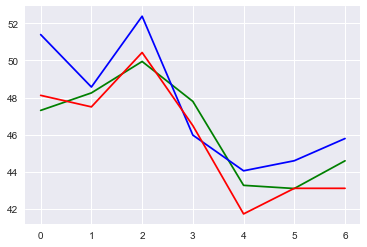

In [0]:
plt.plot(y_pred_rf1, 'g')
plt.plot(y_pred_rf2, 'b')
plt.plot(y_pred_rf3, 'r')

In [0]:
y_pred_rf1 = np.array(y_pred_rf1)
y_pred_rf1 = y_pred_rf1.astype('float64')
y_pred_rf1 = pd.DataFrame(y_pred_rf1)
y_pred_rf1= np.array(y_pred_rf1)

In [0]:
y_pred_rf2 = np.array(y_pred_rf2)
y_pred_rf2 = y_pred_rf2.astype('float64')
y_pred_rf2 = pd.DataFrame(y_pred_rf2)
y_pred_rf2= np.array(y_pred_rf2)

In [0]:
y_pred_rf3 = np.array(y_pred_rf3)
y_pred_rf3 = y_pred_rf3.astype('float64')
y_pred_rf3 = pd.DataFrame(y_pred_rf3)
y_pred_rf3= np.array(y_pred_rf3)

### Best 2 Random Forest Models Metrics

#### X_train6

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_rf1)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf1))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_rf1)/(abs(y_test.values)+abs(y_pred_rf1))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_rf1 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_rf1/y_test.values))))

R2: 0.7329374437749339
RMSE: 2.3567894323785947
SMAPE: [2.18646771]
%bias: [-0.71922841]
Mean Accuracy: [0.01698427]


In [0]:
rf_best1.feature_importances_

array([0.09337567, 0.05453689, 0.33407903, 0.25835183, 0.25965657])

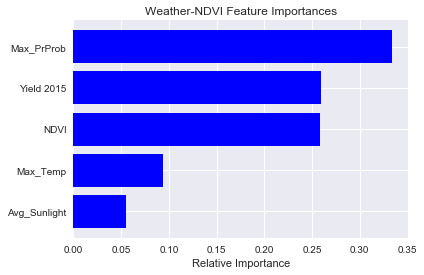

In [0]:
features = X_train6.columns
importances = rf_best1.feature_importances_
indices = np.argsort(importances)

plt.title('Weather-NDVI Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### X_train7

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_rf2)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf2))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_rf2)/(abs(y_test.values)+abs(y_pred_rf2))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_rf2 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_rf2/y_test.values))))

R2: 0.6921790088374424
RMSE: 2.5302497900405005
SMAPE: [2.46677925]
%bias: [1.8860992]
Mean Accuracy: [-0.16245476]


In [0]:
rf_best2.feature_importances_

array([0.2238521 , 0.44113565, 0.33501225])

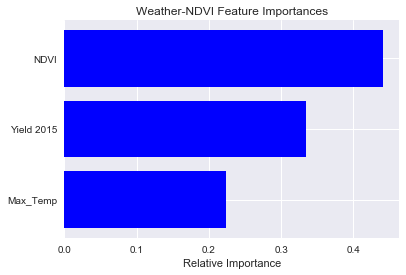

In [0]:
features = X_train7.columns
importances = rf_best2.feature_importances_
indices = np.argsort(importances)

plt.title('Weather-NDVI Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### X_train8

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_rf3)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf3))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_rf3)/(abs(y_test.values)+abs(y_pred_rf3))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_rf3 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_rf3/y_test.values))))

R2: 0.8001764328855209
RMSE: 2.0386263582548527
SMAPE: [1.80757616]
%bias: [-1.87630129]
Mean Accuracy: [0.10657299]


In [0]:
rf_best3.feature_importances_

array([0.33146903, 0.3275929 , 0.34093807])

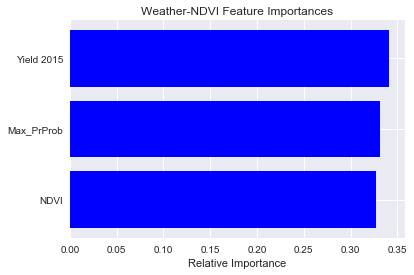

In [0]:
features = X_train8.columns
importances = rf_best3.feature_importances_
indices = np.argsort(importances)

plt.title('Weather-NDVI Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Compare all models

#### Linear Regression

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_ln2)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_ln2))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_ln2)/(abs(y_test.values)+abs(y_pred_ln2))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_ln2 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_ln2/y_test.values))))

R2: 0.5262151383703928
RMSE: 3.139097979526131
SMAPE: [2.83242221]
%bias: [-0.63368856]
Mean Accuracy: [0.00475971]


#### Random Forest X_train6

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_rf1)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf1))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_rf1)/(abs(y_test.values)+abs(y_pred_rf1))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_rf1 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_rf1/y_test.values))))

R2: 0.7329374437749339
RMSE: 2.3567894323785947
SMAPE: [2.18646771]
%bias: [-0.71922841]
Mean Accuracy: [0.01698427]


#### Random Forest X_train7

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_rf2)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf2))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_rf2)/(abs(y_test.values)+abs(y_pred_rf2))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_rf2 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_rf2/y_test.values))))

R2: 0.6921790088374424
RMSE: 2.5302497900405005
SMAPE: [2.46677925]
%bias: [1.8860992]
Mean Accuracy: [-0.16245476]


#### Random Forest X_train8

In [0]:
print("R2: {}".format(r2_score(y_test, y_pred_rf3)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf3))))
print("SMAPE: {}".format(100 * (sum(abs(y_test.values-y_pred_rf3)/(abs(y_test.values)+abs(y_pred_rf3))))/(len(y_test.values))))
print("%bias: {}".format(100 * (sum(y_pred_rf3 - y_test.values) / sum(y_test.values))))
print("Mean Accuracy: {}".format(sum(1 - abs(y_pred_rf3/y_test.values))))

R2: 0.8001764328855209
RMSE: 2.0386263582548527
SMAPE: [1.80757616]
%bias: [-1.87630129]
Mean Accuracy: [0.10657299]


### Ridge Regression

In [0]:
regr = Ridge(random_state=55)

In [0]:
regr.fit(X_train1, y_train)
regr.score(X_train1, y_train)

0.6537455086487042

In [0]:
regr.score(X_test1, y_test)

0.574539007621127

In [0]:
regr.fit(X_train2, y_train)
regr.score(X_train2, y_train)

0.6393461933968405

In [0]:
regr.score(X_test2, y_test)

0.5942462276685266

In [0]:
regr.fit(X_train3, y_train)
regr.score(X_train3, y_train)

0.09387846938420141

In [0]:
regr.score(X_test3, y_test)

-0.34254297870118844

In [0]:
regr.fit(X_train4, y_train)
regr.score(X_train4, y_train)

0.6354771201831161

In [0]:
regr.score(X_test4, y_test)

0.5566811247031208

In [0]:
regr.fit(X_train5, y_train)
regr.score(X_train5, y_train)

0.022397732288367833

In [0]:
regr.score(X_test5, y_test)

-0.01724993115852058

In [0]:
regr.fit(X_train6, y_train)
regr.score(X_train6, y_train)

0.6549589176085535

In [0]:
regr.score(X_test6, y_test)

0.4904882439703233

#### 2018 Prediction on best model (Random Forest on X_train8)

In [ ]:
weather_ndvi_2018 = weather_ndvi_2018.drop(['County'], axis = 1)

In [0]:
X_2018 = weather_ndvi_2018[['Max_PrProb','NDVI','Yield 2017']] # currently used

#### Linear Regression Model 2

In [0]:
y_pred_2018 = rf_best3.predict(X_2018)
y_pred_2018 = pd.DataFrame(y_pred_2018)

In [0]:
counties= ['Yolo','Fresno','Kern','Merced','Kings','San Joaquin','Solano','Stanislaus']

In [0]:
counties

['Yolo',
 'Fresno',
 'Kern',
 'Merced',
 'Kings',
 'San Joaquin',
 'Solano',
 'Stanislaus']

In [0]:
y_pred_2018

,0
0,44.801
1,48.119
2,47.648
3,47.776
4,50.659
5,44.801
6,44.138
7,44.801


In [0]:
# df = pd.DataFrame({‘Value’:bc_Value[0], ‘Quantity_2016’:bc_Quantity_2016[0]})
#yield_2018 = pd.DataFrame({'Yield_2018':y_pred_2018,'County':counties})
yield_2018 = pd.DataFrame(columns={'Yield_2018','County'})

yield_2018[['Yield_2018']] = y_pred_2018
yield_2018[['County']]= counties

In [0]:
yield_2018

,Yield_2018,County
0,44.305,Yolo
1,46.837,Fresno
2,46.837,Kern
3,47.779,Merced
4,49.704,Kings
5,44.185,San Joaquin
6,44.185,Solano
7,44.932,Stanislaus


In [0]:
yield_2018.to_csv('predicted_yield_2018.csv')